# Big Mart Sales - Regression Problem - Predict Sales

In [1]:
# Importing necessary libraries

import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the Datasets

In [2]:
df = os.chdir("D:\\Naveen\\Data Science\\Internships\\Nuclei - Online\\Projects\\Internship Project 1")

In [3]:
train = pd.read_csv("Train_UWu5bXk.csv")
test = pd.read_csv("Test_u94Q5KV.csv")
dataframes = [train, test]
test_id1 = test["Item_Identifier"]
test_id2 = test["Outlet_Identifier"]

In [4]:
#check shape

print(train.shape, test.shape)

(8523, 12) (5681, 11)


In [5]:
#merging the train and test datasets
#We add colums to identify train and test datasets
#train['source'] = 'train'
#test['source'] = 'test'
#test['Item_Outlet_Sales'] = 0
#data = pd.concat([train, test], sort = False)
#print(train.shape, test.shape, data.shape)

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
#Checking how the numerical data is spread

train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [9]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [10]:
#Checking Data types of the columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


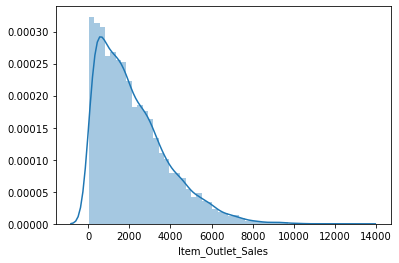

In [12]:
#Checking how the data is spread as we are going to predict the sales

sns.distplot(train['Item_Outlet_Sales'])
plt.show()

# Cleaning the data

In [13]:
#Checking for missing data

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
#There are also some 0 values and we will treat it as missing values
#Sales will have "0" as we have added that to the test set

train.eq(0).sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [16]:
test.eq(0).sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              353
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [17]:
#imputing missing values using sklearn
#the mean and median are almost equal for Item_Weight and Item_Visibility so we can use either the mean or the median

for data in dataframes:
    data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].median())
    
for data in dataframes:
    data.replace(0, np.nan, inplace=True)
    data['Item_Visibility'] = data['Item_Visibility'].fillna(data['Item_Visibility'].median())

In [18]:
#testing datasets after imputing

train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [20]:
train.eq(0).sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
test.eq(0).sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [22]:
#imputing outlet size with mode - the only categorical data with missing values

for data in dataframes:
    data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

In [23]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [25]:
#We can see that the fat content values are not uniform. 

train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [27]:
#Correct this error and group into 2 values

for data in dataframes:
    data.Item_Fat_Content = train.Item_Fat_Content.replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'})

In [28]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
#Now checking outlet established years

train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [30]:
#The item identifier is only divided into three using the first letters so we will modify them to sensible categories:
for data in dataframes:
    data['Item_Type_New'] = data['Item_Identifier'].apply(lambda x: x[0:2])

    #Rename them to more intuitive categories:
for data in dataframes:
    data['Item_Type_New'] = data['Item_Type_New'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

In [31]:
train.Item_Type_New.value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_New, dtype: int64

In [32]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


# Exploratory Data Analysis

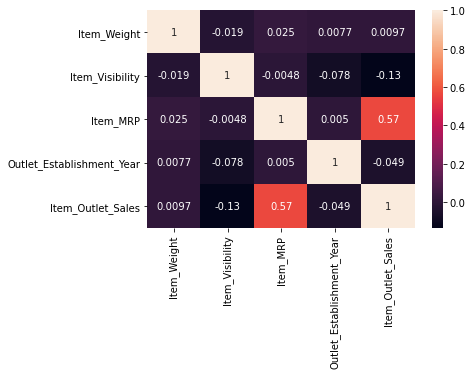

In [33]:
#Checking how the correlation is

sns.heatmap(train.corr(), annot = True)
plt.show()

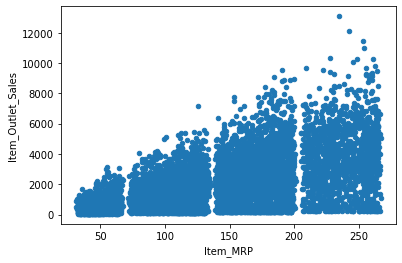

In [34]:
#We can see that MRP is more related to sales

train.plot(x ='Item_MRP', y='Item_Outlet_Sales', kind = 'scatter')

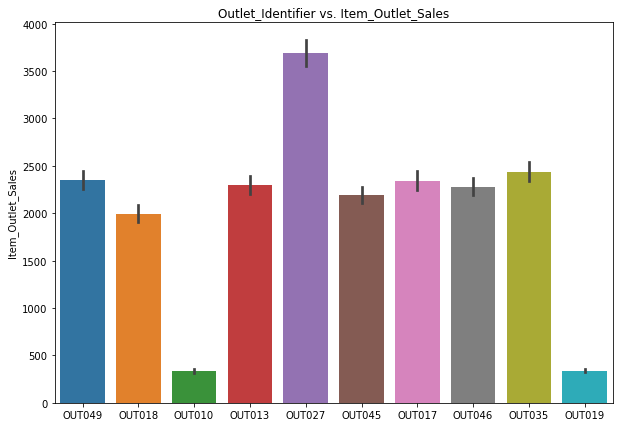

In [35]:
#Checking the relation between outlet type and sales

plt.figure(figsize = (10,7))
plot = sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train)
plot.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

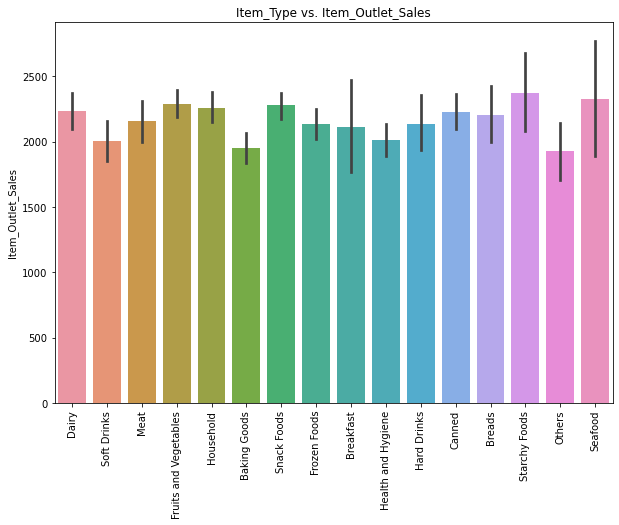

In [36]:
#Checking the relation between item type and sales

plt.figure(figsize = (10,7))
plot = sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plot.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

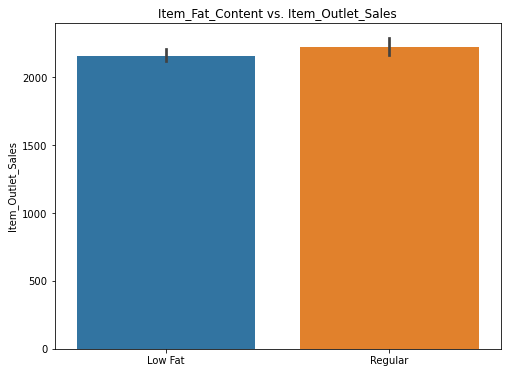

In [37]:
#Checking the relation between item fat content and sales

plt.figure(figsize = (8,6))
plot = sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train)
plot.set_title("Item_Fat_Content vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

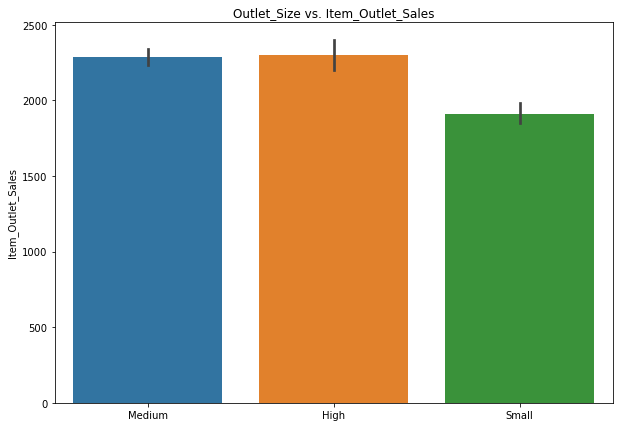

In [38]:
#Checking the relation between outlet size and sales

plt.figure(figsize = (10,7))
plot = sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train)
plot.set_title("Outlet_Size vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

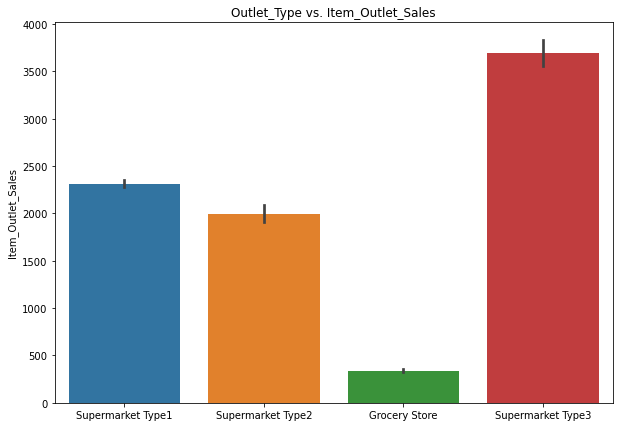

In [39]:
#Checking the relation between outlet type and sales

plt.figure(figsize = (10,7))
plot = sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)
plot.set_title("Outlet_Type vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

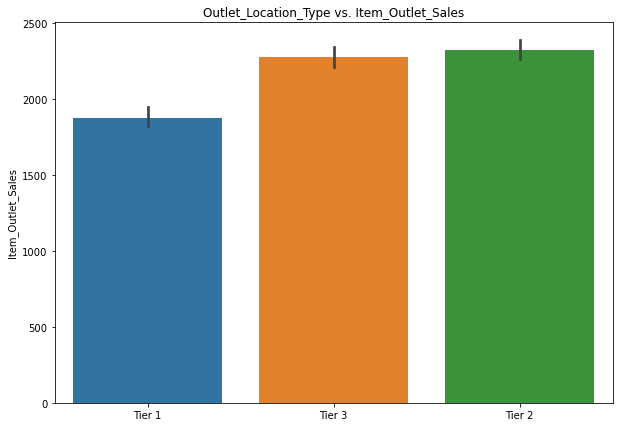

In [40]:
#Checking the relation between outlet location type and sales

plt.figure(figsize = (10,7))
plot = sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train)
plot.set_title("Outlet_Location_Type vs. Item_Outlet_Sales", fontsize=12)
plot.set_xlabel("", fontsize=10)
plot.set_ylabel("Item_Outlet_Sales", fontsize=10)
plt.show()

In [41]:
# determining the operation peroid of stores

for data in dataframes:
    data['Operating_Years'] = 2013 - data['Outlet_Establishment_Year']

In [42]:
train.Operating_Years.value_counts()

28    1463
26     932
14     930
9      930
16     930
11     929
4      928
6      926
15     555
Name: Operating_Years, dtype: int64

In [43]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Operating_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Low Fat,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Encoding variables

In [44]:
#Creating a new variable to to make Outlet identifier into categories

from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

for data in dataframes:
    data['Outlet'] = lab_enc.fit_transform(data['Outlet_Identifier'])

In [45]:
#Converting other categorical variables into numerical values

for data in dataframes:
    data['Item_Fat_Content'] = lab_enc.fit_transform(data['Item_Fat_Content'])
    data['Outlet_Location_Type'] = lab_enc.fit_transform(data['Outlet_Location_Type'])
    data['Outlet_Size'] = lab_enc.fit_transform(data['Outlet_Size'])
    data['Item_Type_New'] = lab_enc.fit_transform(data['Item_Type_New'])
    data['Outlet_Type'] = lab_enc.fit_transform(data['Outlet_Type'])
    data['Outlet'] = lab_enc.fit_transform(data['Outlet_Identifier'])

In [46]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Operating_Years,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,1,14,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,1,14,9
3,FDX07,19.20,1,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,1,15,0
4,NCD19,8.93,0,0.057792,Household,53.8614,OUT013,1987,0,2,1,994.7052,2,26,1


In [47]:
#Encoding variables
for data in dataframes:
    data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size',
                                     'Outlet_Type','Item_Type_New','Outlet'])

In [48]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Operating_Years,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,1,14,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,1,14,9
3,FDX07,19.20,1,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,1,15,0
4,NCD19,8.93,0,0.057792,Household,53.8614,OUT013,1987,0,2,1,994.7052,2,26,1


In [49]:
for data in dataframes:
    data.drop('Item_Identifier', axis = 1, inplace=True)
    data.drop('Outlet_Identifier', axis = 1, inplace=True)
    data.drop('Item_Type', axis = 1, inplace=True)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int32  
 6   Outlet_Location_Type       8523 non-null   int32  
 7   Outlet_Type                8523 non-null   int32  
 8   Item_Outlet_Sales          8523 non-null   float64
 9   Item_Type_New              8523 non-null   int32  
 10  Operating_Years            8523 non-null   int64  
 11  Outlet                     8523 non-null   int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 599.4 KB


# Splitting Data Set

In [51]:
# combining the train and test dataset

data = pd.concat([train, test])

print(data.shape)

(14204, 12)


In [52]:
# one hot encoding

data = pd.get_dummies(data)
print(data.shape)

(14204, 12)


In [53]:
#Splitting data into dependent and independent variables

x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 11)
(14204,)


In [54]:
y = y.fillna(method='ffill')

In [55]:
# splitting the dataset into train and test

train1 = data.iloc[:8523,:]
test1 = data.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [56]:
#Splitting into train and test 

#making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11363, 11)
(11363,)
(2841, 11)
(2841,)


In [57]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11363 entries, 6942 to 6767
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                11363 non-null  float64
 1   Item_Fat_Content           11363 non-null  int32  
 2   Item_Visibility            11363 non-null  float64
 3   Item_MRP                   11363 non-null  float64
 4   Outlet_Establishment_Year  11363 non-null  int64  
 5   Outlet_Size                11363 non-null  int32  
 6   Outlet_Location_Type       11363 non-null  int32  
 7   Outlet_Type                11363 non-null  int32  
 8   Item_Type_New              11363 non-null  int32  
 9   Operating_Years            11363 non-null  int64  
 10  Outlet                     11363 non-null  int32  
dtypes: float64(3), int32(6), int64(2)
memory usage: 799.0 KB


In [58]:
y_train

6942     256.9988
5204     765.6700
341      539.2980
4639    3169.2080
5421     765.6700
          ...    
5177     765.6700
6831     254.3356
1692     765.6700
6600     588.5672
6767    2150.5340
Name: Item_Outlet_Sales, Length: 11363, dtype: float64

# Fitting into Models

### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression(n_jobs = -1)
linreg.fit(x_train, y_train)

#test set results
y_pred = linreg.predict(x_test)
print(y_pred)

# finding the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))

[ 864. 1554. 2145. ... 2931. 1319. 1798.]
RMSE : 1298.0455007727894


### Ridge Regression

In [60]:
from sklearn.linear_model import Ridge

ridreg = Ridge()
ridreg.fit(x_train, y_train)

#test set results
y_pred = ridreg.predict(x_test)
print(y_pred)

# finding the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))

[ 866.25717811 1553.2694773  2143.87651794 ... 2929.65941101 1319.1501085
 1797.80187292]
RMSE : 1298.1060950451013


### Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor()
dtreg.fit(x_train, y_train)

#test set results
y_pred = dtreg.predict(x_test)
print(y_pred)

# finding the Root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))

[ 307.5996 2536.698  2752.4172 ... 8209.314  2365.5874  765.67  ]
RMSE : 1601.2065801765577


### Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators = 500, n_jobs = -1)
rfreg.fit(x_train, y_train)

#test set results
y_pred = rfreg.predict(x_test)
print(y_pred)

# finding the Root mean squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))

[ 442.6877568 1989.9457032 1883.9769752 ... 4963.4804096 1507.530992
 1548.6867532]
RMSE : 1170.5364951513561


In [63]:
y_pred2 = rfreg.predict(x)

In [64]:
data["Predicted"] = y_pred2

In [65]:
data.to_csv("D:\\Naveen\\Data Science\\Internships\\Nuclei - Online\\Projects\\Internship Project 1\\pred_Randomforest.csv")